<a href="https://colab.research.google.com/github/danaldi/yolov7-object-tracking/blob/main/Otomasi_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies


In [1]:
cd /content

/content


In [2]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1133, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1133 (delta 0), reused 1 (delta 0), pack-reused 1130
Receiving objects: 100% (1133/1133), 69.94 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (520/520), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.3 MB/s eta 0:00:00


# Dataset beberapa frame video yang udah dilabelin buat training


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SiSi3WUNVU5H8pdYpzEx")
project = rf.workspace("icare-dataset-person-counter").project("autolabel-test")
dataset = project.version(1).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=fbbf844ce374e69ebec3faece0d1fb2b71c72dd7d3038fb6ca6f2691c6ef6fd0
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninsta

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to autolabel-test-1 in yolov7pytorch:: 100%|██████████| 28/28 [00:00<00:00, 2857.71it/s]


# Load model yang udah ditrain pake dataset gede, retrain pake dataset frame video

download dulu disini : 
terus upload ke sini

In [4]:
%cd /content/yolov7

/content/yolov7


In [5]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!gdown 1q8N46J9dYkIWaDXYUuUXXJsu8x7cTEsx

Downloading...
From: https://drive.google.com/uc?id=1q8N46J9dYkIWaDXYUuUXXJsu8x7cTEsx
To: /content/yolov7/best.pt
100% 74.8M/74.8M [00:01<00:00, 74.1MB/s]


In [7]:
# run this cell to begin training
!python train.py --batch 16 --epochs 300 --data {dataset.location}/data.yaml --weights '/content/yolov7/best.pt' --device 0 --cache --v5-metric


YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='/content/yolov7/best.pt', cfg='', data='/content/yolov7/autolabel-test-1/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=300, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=True, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=True, world_size=1, global_rank=-1, save_dir='runs/train/exp', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-19 12:38:26.134284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is 

# Prepare Dataset yang belum dilabelin

In [8]:
mkdir test_dataset

In [9]:
cd test_dataset

/content/yolov7/test_dataset


In [10]:
!gdown 19GBQD2vye8HYhLxVFbPXlsgr8ILkI6Mg

Downloading...
From: https://drive.google.com/uc?id=19GBQD2vye8HYhLxVFbPXlsgr8ILkI6Mg
To: /content/yolov7/test_dataset/test_dataset.zip
100% 857k/857k [00:00<00:00, 143MB/s]


In [11]:
!unzip test_dataset.zip 

Archive:  test_dataset.zip
  inflating: ezgif-frame-026.jpg     
  inflating: ezgif-frame-027.jpg     
  inflating: ezgif-frame-028.jpg     
  inflating: ezgif-frame-029.jpg     
  inflating: ezgif-frame-030.jpg     
  inflating: ezgif-frame-031.jpg     
  inflating: ezgif-frame-032.jpg     
  inflating: ezgif-frame-033.jpg     
  inflating: ezgif-frame-034.jpg     
  inflating: ezgif-frame-035.jpg     
  inflating: ezgif-frame-001.jpg     
  inflating: ezgif-frame-002.jpg     
  inflating: ezgif-frame-003.jpg     
  inflating: ezgif-frame-004.jpg     
  inflating: ezgif-frame-005.jpg     
  inflating: ezgif-frame-006.jpg     
  inflating: ezgif-frame-007.jpg     
  inflating: ezgif-frame-008.jpg     
  inflating: ezgif-frame-009.jpg     
  inflating: ezgif-frame-010.jpg     
  inflating: ezgif-frame-011.jpg     
  inflating: ezgif-frame-012.jpg     
  inflating: ezgif-frame-013.jpg     
  inflating: ezgif-frame-014.jpg     
  inflating: ezgif-frame-015.jpg     
  inflating: ezgif-fram

In [12]:
cd /content/yolov7/

/content/yolov7


# Tes Deteksi pake beberapa frame video yang belum dilabelin

In [22]:
# Run evaluation
!python detect.py --weights /content/yolov7/runs/train/exp/weights/best.pt --conf 0.5 --source /content/yolov7/test_dataset --no-download


Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], download=False, source='/content/yolov7/test_dataset', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='object_tracking', exist_ok=False, no_trace=False, blur=False)
YOLOR 🚀 8ee00d6 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model...

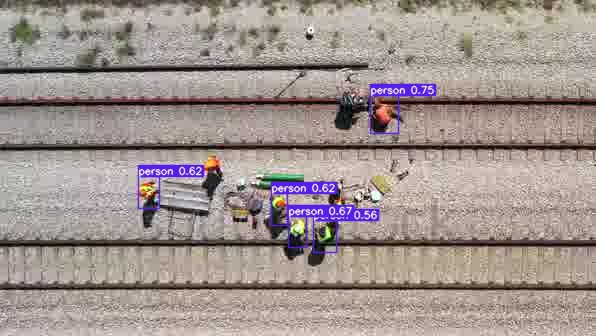

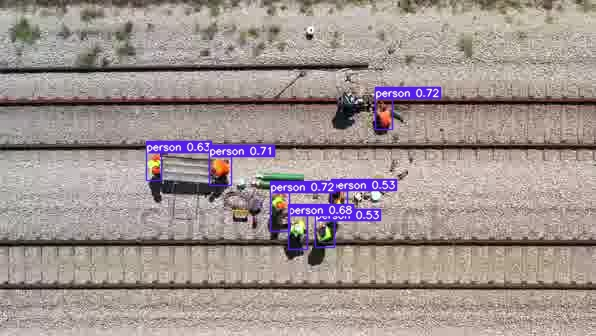

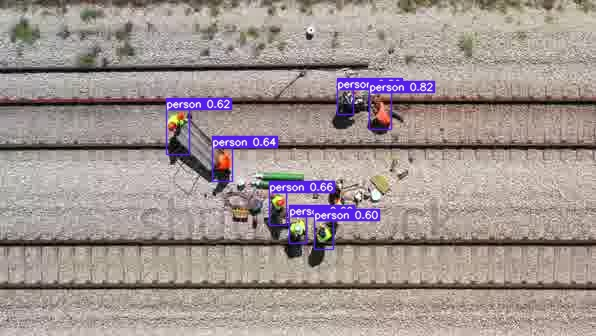

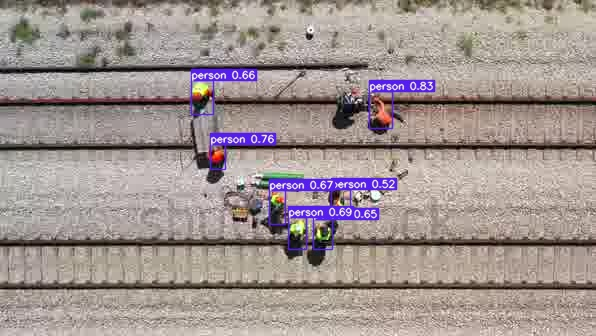

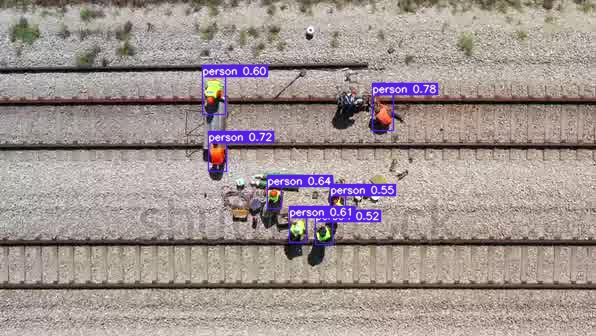

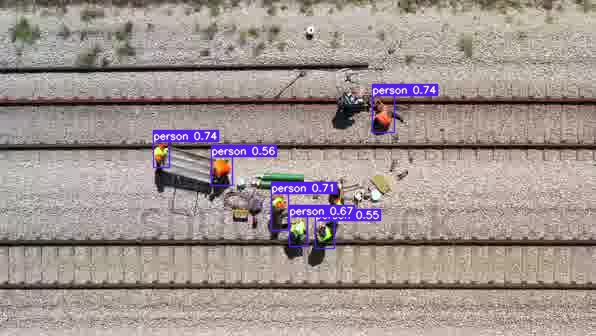

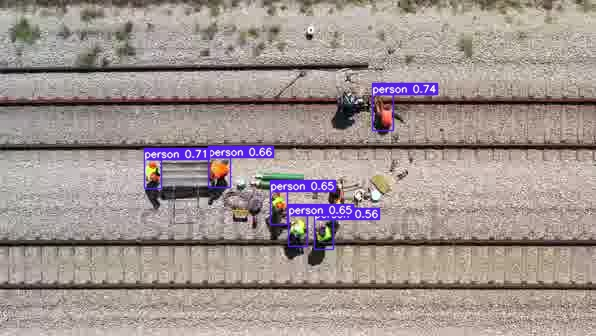

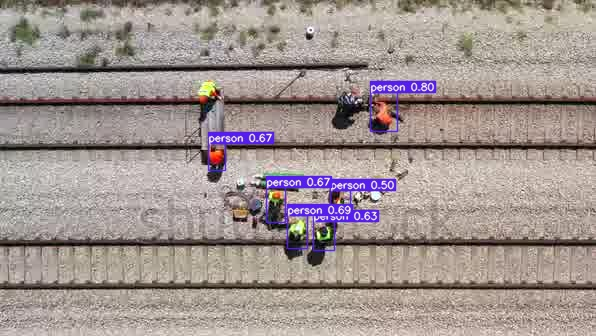

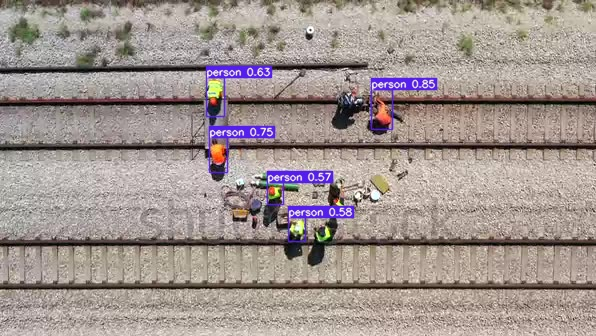

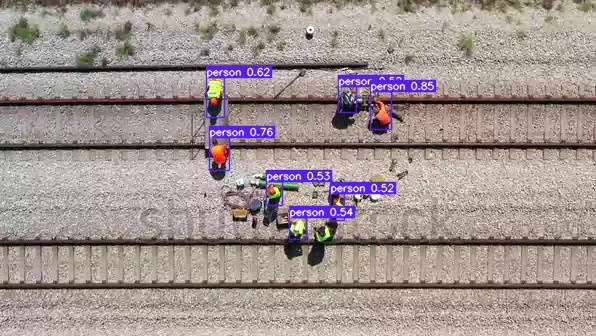

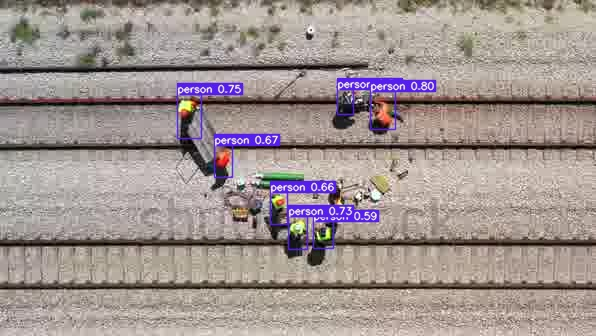

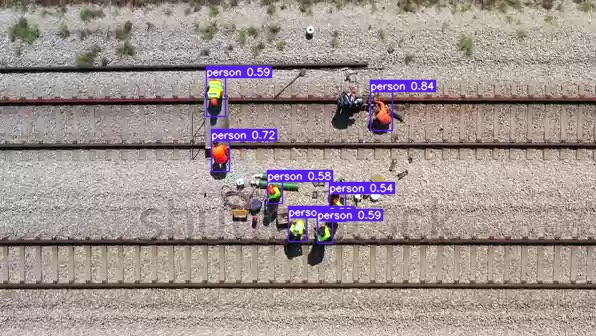

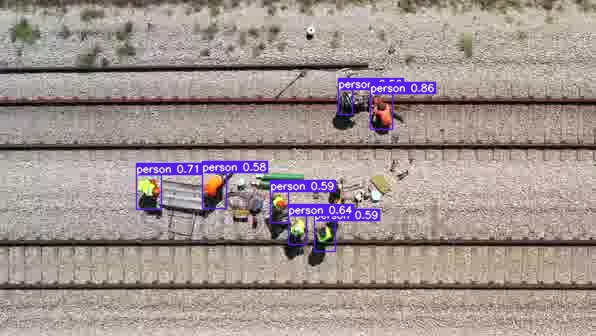

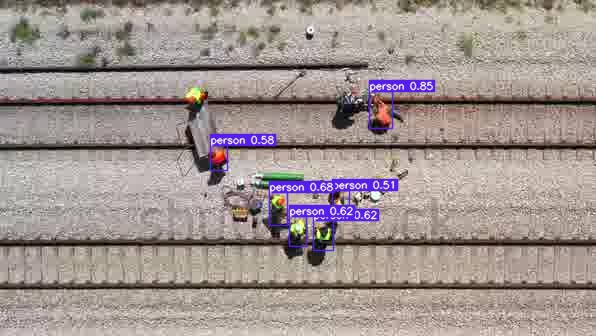

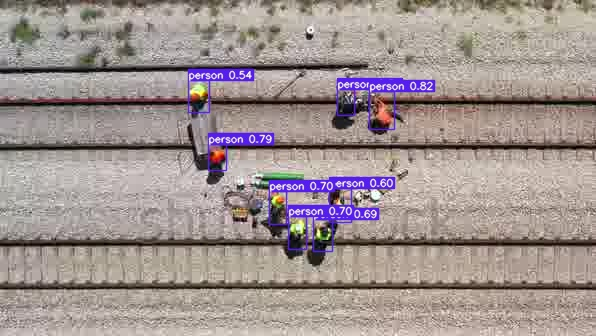

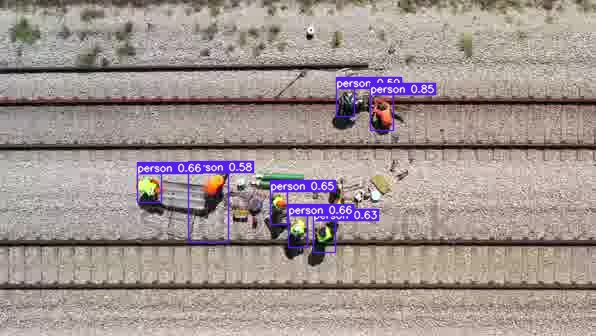

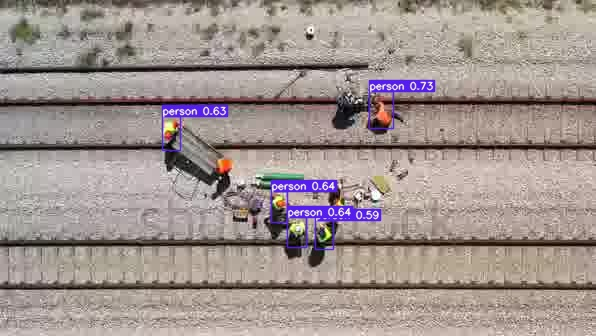

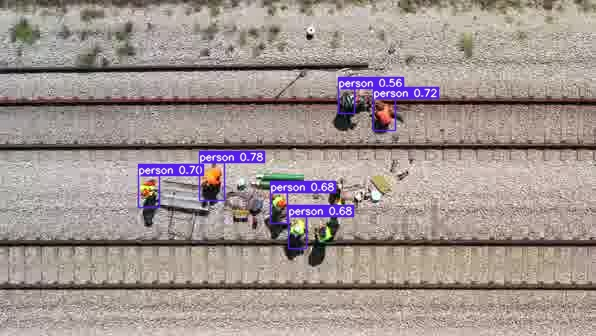

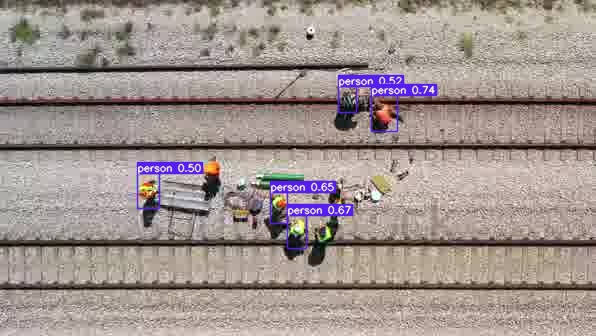

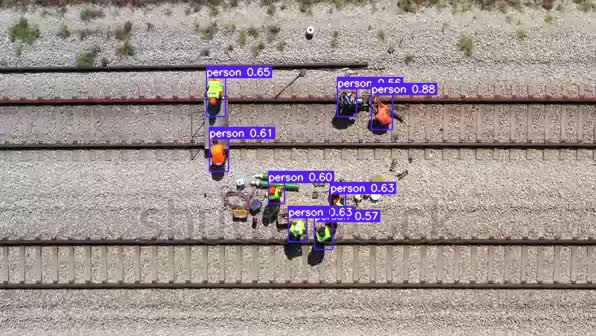

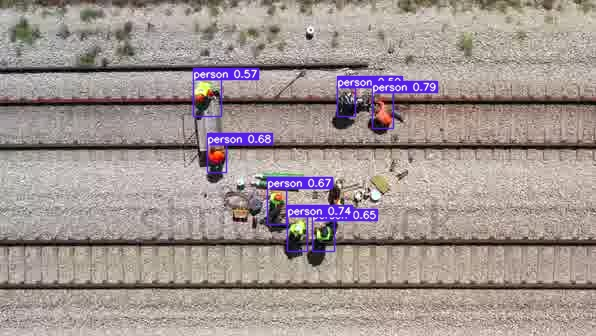

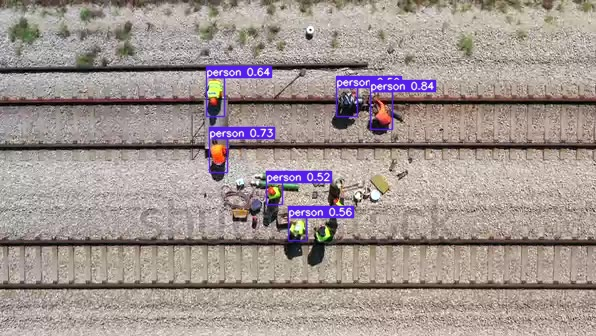

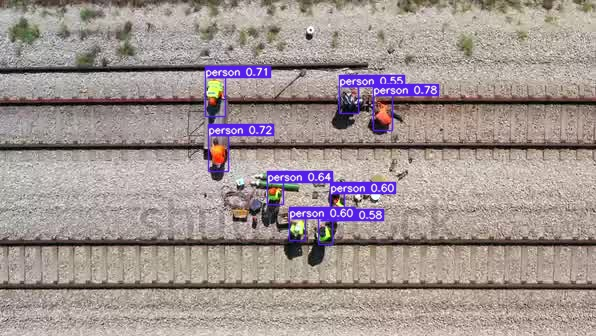

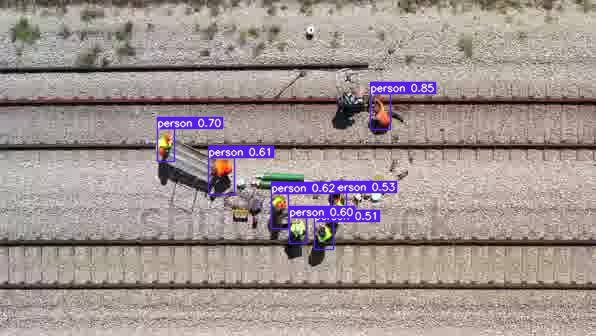

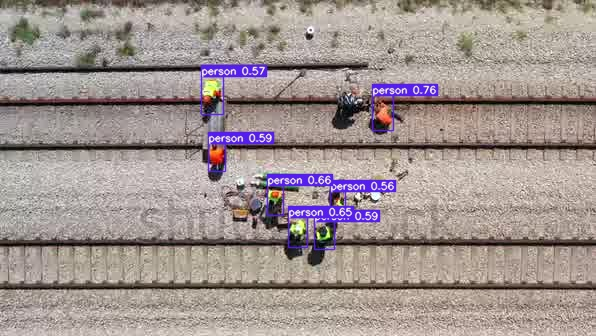

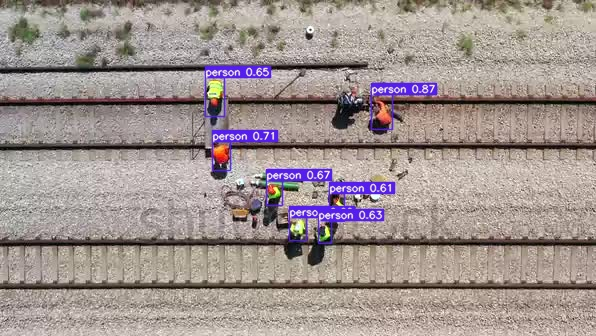

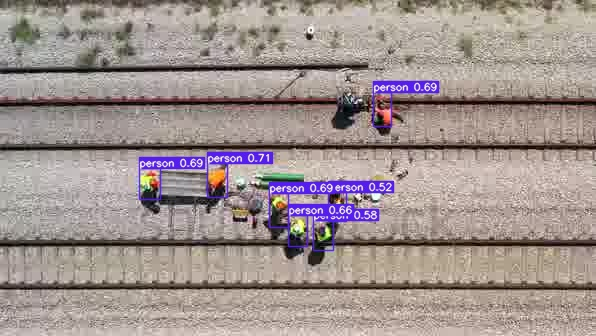

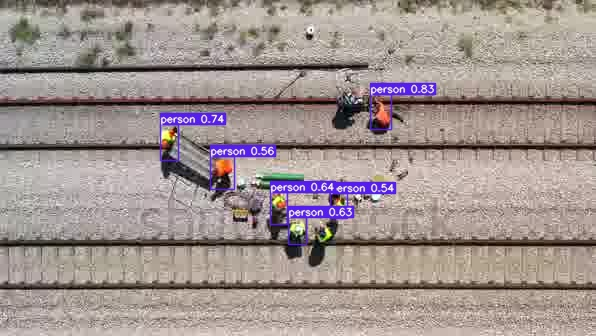

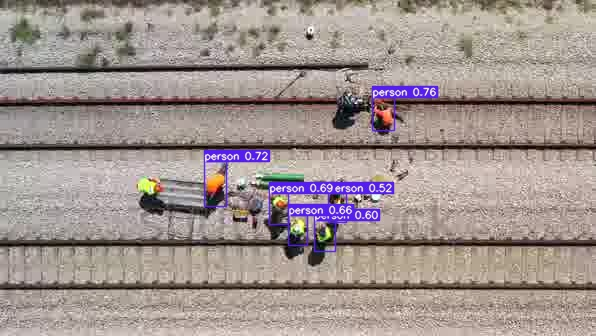

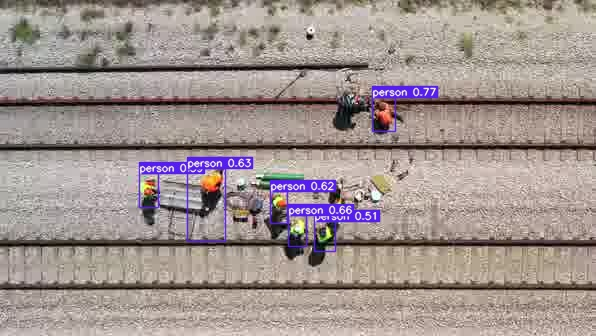

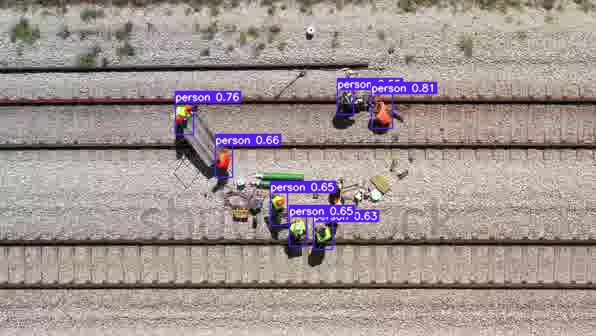

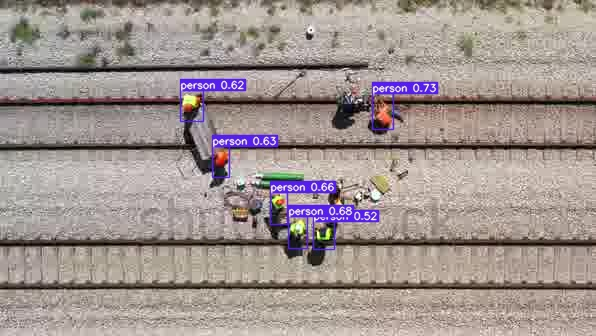

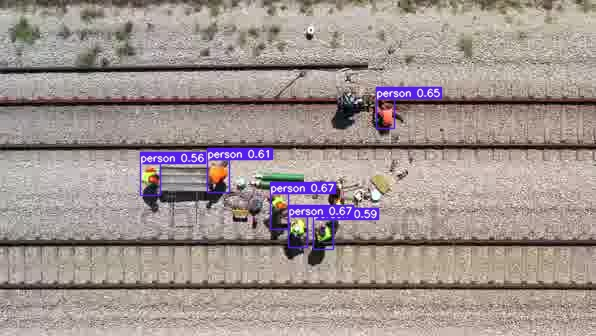

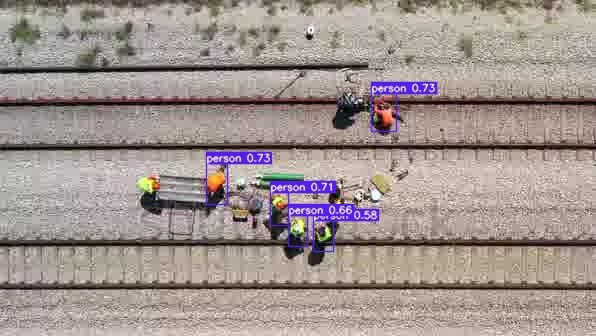

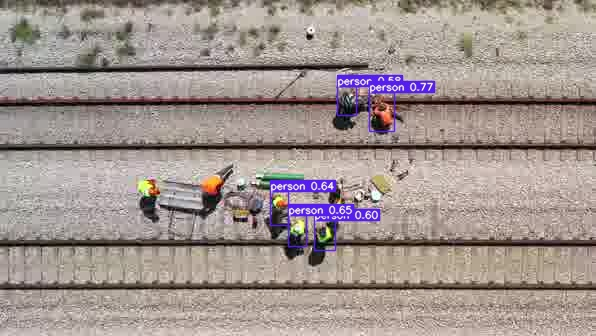

In [24]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7-object-tracking/runs/detect/object_tracking2/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    

# Kalau udah oke, lanjut Tracking

In [15]:
cd /content

/content


##### **Clone the YOLOv7 Object Tracking Code**

In [16]:
!git clone https://github.com/danaldi/yolov7-object-tracking

Cloning into 'yolov7-object-tracking'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 200 (delta 83), reused 73 (delta 73), pack-reused 104
Receiving objects: 100% (200/200), 155.90 KiB | 15.59 MiB/s, done.
Resolving deltas: 100% (99/99), done.


##### **Move to YOLOv7 Object Tracking Repository**

In [17]:
%cd "yolov7-object-tracking"

/content/yolov7-object-tracking


##### **Install requirements**

In [18]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.4/408.4 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 101.1 MB/s eta 0:00:00
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110473 sha256=18a5b6d01e70eddf94176d7d040591ad26a624f4c32513162d6e3f026bb609b6
  Stored in directory: /root/.cache/pip/wheels/53/e6/de/a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: proto

##### **Detect and Track**

make sure video fpsnya sesuai sama yang diharapkan, karena modelnya bakal ekstrak gambar dan data boundingbox dari framerate video

In [19]:
!gdown 1kIKivwgIyf5FjDBKLCAAwOjsuVI8lz21

Downloading...
From: https://drive.google.com/uc?id=1kIKivwgIyf5FjDBKLCAAwOjsuVI8lz21
To: /content/yolov7-object-tracking/test_video.mp4
100% 2.75M/2.75M [00:00<00:00, 144MB/s]


In [28]:
!python detect_and_track.py --weights /content/yolov7/runs/train/exp/weights/best.pt --source "test_video.mp4" --save-txt --save-bbox-dim --conf-thres 0.5 --no-download

Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], download=False, source='test_video.mp4', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='object_tracking', exist_ok=False, no_trace=False, colored_trk=False, save_bbox_dim=True, save_with_object_id=False)
YOLOR 🚀 8ee00d6 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 G

In [2]:
from IPython.display import HTML

HTML(f"""<video width="500" height="400" controls>
             <source src="/content/yolov7-object-tracking/runs/detect/object_tracking2/test_video.mp4" type="video/mp4">
         </video>""")